<font size="56">Daniel Pastewski</font>

# Opis projektu

Projekt ma na celu zbadanie średnich pomiarów meteorologicznych z lat 1951-2000 we wszytskich stacjach IMGW w Polsce. Poprzez wizualizacje zależności między zmiennymi może dowiedzieć się czy obserwacja któregoś ze zjawisk da nam również częściową informację o innym z nich oraz pomoże przewidywać czy zmiany któregoś z nich mogą pociągnąć ze sobą inne konsekwencje. Dzięki stworzeniu interaktywnego narzędzia do obserwacji wybranych ze zbioru zjawisk w dowolnym przedziale czasowym dla każdej stacji będziemy mogli w szybki i szczegółowy sposób przeanalizować wszystkie dostępne dane i wyciągnać z nich dalsze wnioski.

# Zbiór danych


Zbiór danych skałada się z 50 plików csv pozyskanych z archiwum IMGW, z dziennymi pomiarami meteorologicznymi
dla każdej stacji w Polsce. Każdy plik to oddzielny rok, zaczynając od 1951 i kończąc na 2000 roku, łącznie 2 704 735 wierszy. W zbiorze znajduje się 13 kolumn opisujących nastepujące zmienne:
- Kod stacji - 9 liczbowy kod identyfikacji stacji nadany przez IMGW
- Nazwa stacji - Pisana wielkimi literami nazwa powiązana z lokalizacją stacji np. LIDZBARK WARMIŃSKI
- Rok - Rok z którego pochodzi pomiar
- Miesiac - Miesiąc z którego pochodzi pomiar
- Dzien - Dzień z którego pochodzi pomiar
- Średnia dobowa temperatura [°C]
- Status pomiaru TEMP - status pomiaru powyższej zmiennej, przybiera wartość 8 dla braku pomiaru i 9 dla braku zjawiska (0 lub NaN dla pomiaru)
- Średnia dobowa wilgotność względna [%]
- Status pomiaru WLGS - status pomiaru powyższej zmiennej, przybiera wartość 8 dla braku pomiaru i 9 dla braku zjawiska (0 lub NaN dla pomiaru)
- Średnia dobowa prędkość wiatru [m/s], zaokrąglona w ten sposób że wartość dziesiętna wynosi "0", "3" lub "7".
- Status pomiaru FWS - status pomiaru powyższej zmiennej, przybiera wartość 8 dla braku pomiaru i 9 dla braku zjawiska (0 lub NaN dla pomiaru)
- Średnie dobowe zachmurzenie ogólne [oktanty], zmienna nie jest ciągła przyjmuje wartości od 0 do 8, z wartością dziesiętną "0", "3" lub "7", w sumie 25 różnych wartości
- Status pomiaru NOS - status pomiaru powyższej zmiennej, przybiera wartość 8 dla braku pomiaru i 9 dla braku zjawiska (0 lub NaN dla pomiaru)

Import bibliotek

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import math
import csv
import pylab as pl
import datetime
from matplotlib import cm

Zdefiniowanie palety kolorów i nadanie przybliżonej nazwy w języku polskim.

In [ ]:
mojapaleta = sns.color_palette("hls", 12)
mojapaleta2 = sns.color_palette("hls", 25)

nazwykolorow = ["czerwony","pomarańczowy","żółty","limonkowy","zielony",
 "morski","błękitny","niebieski","granatowy","fioletowy","różowy","malinowy"]


Pobranie w pętli wszystkich 50 zbiorów danych i połączenie ich w jeden DataFrame.

In [ ]:
zbiory = pd.DataFrame()

for i in range(1951, 2001):
    nazwa = r"/content/k_d_t_"+ str(i) + ".csv"

    dane = pd.read_csv(nazwa, header=None, encoding='cp1250', error_bad_lines=False)

    zbiory = zbiory.append(pd.DataFrame(data = dane), ignore_index=True)
    

Dodanie do zbioru nazw kolumn zgodnie z opisem z IMGW i podejrzenie go.

In [ ]:
zbiory.columns = ["Kod stacji","Nazwa stacji", "Rok", "Miesiac","Dzien",
                     "Średnia dobowa temperatura  [°C]","Status pomiaru TEMP",
                     "Średnia dobowa wilgotność względna [%]","Status pomiaru WLGS",
                     "Średnia dobowa prędkość wiatru [m/s]","Status pomiaru FWS",
                     "Średnie dobowe zachmurzenie ogólne [oktanty]","Status pomiaru NOS"]

zbiory

,Kod stacji,Nazwa stacji,Rok,Miesiac,Dzien,Średnia dobowa temperatura [°C],Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249220040,DYNÓW,1951,1,1,-0.6,NaN,84.8,NaN,6.0,NaN,4.7,NaN
1,249220040,DYNÓW,1951,1,2,2.2,NaN,73.0,NaN,1.3,NaN,2.7,NaN
2,249220040,DYNÓW,1951,1,3,-0.8,NaN,84.5,NaN,1.3,NaN,3.3,NaN
3,249220040,DYNÓW,1951,1,4,1.6,NaN,92.8,NaN,1.7,NaN,8.0,NaN
4,249220040,DYNÓW,1951,1,5,1.6,NaN,90.3,NaN,0.7,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704730,254220090,OLECKO,2000,12,27,-4.0,NaN,0.0,8.0,0.0,8.0,8.0,NaN
2704731,254220090,OLECKO,2000,12,28,-3.4,NaN,0.0,8.0,0.0,8.0,8.0,NaN
2704732,254220090,OLECKO,2000,12,29,-1.7,NaN,0.0,8.0,0.0,8.0,7.7,NaN
2704733,254220090,OLECKO,2000,12,30,-1.9,NaN,0.0,8.0,0.0,8.0,6.3,NaN


Pogrupowanie zbioru po kodzie i nazwie oraz zliczenie liczby wierszy. Pozwala to zaobserwować dla których stacji mamy najwięcej danych.

In [ ]:
zbiory.groupby(['Kod stacji','Nazwa stacji']).size().sort_values(ascending=False)

Kod stacji  Nazwa stacji             
252160110   SZAMOTUŁY-BABORÓWKO          18263
254180060   GDYNIA                       18263
251200030   SKIERNIEWICE                 18263
251190050   PUCZNIEW                     18263
252170210   KÓRNIK                       18263
                                         ...  
249229987   GRABOWNICA                    1096
250180120   KOCHCICE                       945
254180120   BĄKOWO                         366
252230190   CICIBÓR                        275
252210170   WARSZAWA-OBSERWATORIUM II       61
Length: 326, dtype: int64

Stworzenie nowej kolumny zawierającej pełną datę połączoną z kolumn "Rok", "Miesiac" i "Dzien"

In [ ]:
zbiory['Data'] = pd.to_datetime(zbiory['Rok'].apply(str) +"-"+ zbiory['Miesiac'].apply(str) +"-"+ zbiory['Dzien'].apply(str))

# Wykres korelacji

Stworzenie wykresu przedstawiającego korelacje między czterema zmiennymi opisujacymi pogodę w danym zbiorze. Widzimy, że występują między nimi raczej korelacje ujemne, szczególnie między średnią dobową temperaturą, a średnim dobowym zachmurzeniem ogólnym, gdzie wynosi ona -0,2. Natomiast między średnią dobową wilgotnością względną, a średnią dobową prędkością wiatru nie występuje żadna korelacja. Bez szczegółowej wiedzy meteorologicznej ciężko interpretować te wartości.

In [ ]:
wykrescor = zbiory[["Średnia dobowa temperatura  [°C]","Średnia dobowa wilgotność względna [%]",
                   "Średnia dobowa prędkość wiatru [m/s]","Średnie dobowe zachmurzenie ogólne [oktanty]"]]

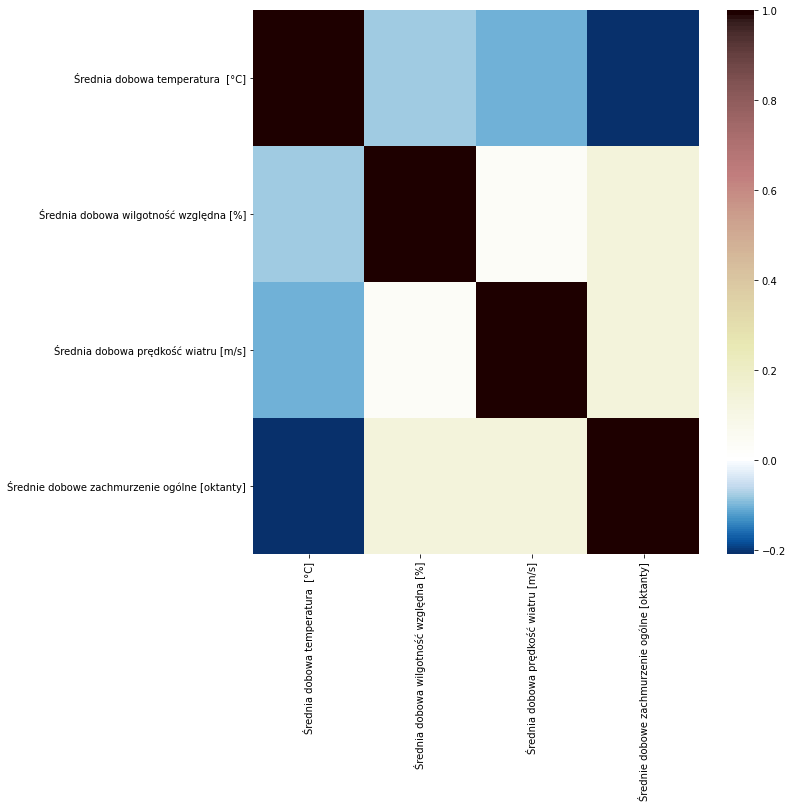

In [ ]:
top = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('pink_r', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 44)),
                      bottom(np.linspace(0, 1, 212))))
newcmp = plc.ListedColormap(newcolors, name='myColormap')

corr = wykrescor.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=newcmp)


# Wykresy zależności między temperaturą a pozostałymi zmiennymi

Wykres 1 typu scatterplot opiera się o próbkę 5000 danych, ze względu na ograniczoną czytelność przy pełnym zbiorze. Widać, że szczególnie niskie poziomy wilgotności występują częściej przy wysokiej temperaturze. Do wykresu dodana jest również linia trendu która potwierdza ujemną korelację.

In [ ]:
wykres1 = zbiory[(zbiory['Średnia dobowa wilgotność względna [%]'] > 0) &
                 (zbiory['Średnia dobowa wilgotność względna [%]'] <= 100) &
                 (zbiory['Średnia dobowa temperatura  [°C]'] != 0)]
wykres1 = wykres1.sample(n=5000)

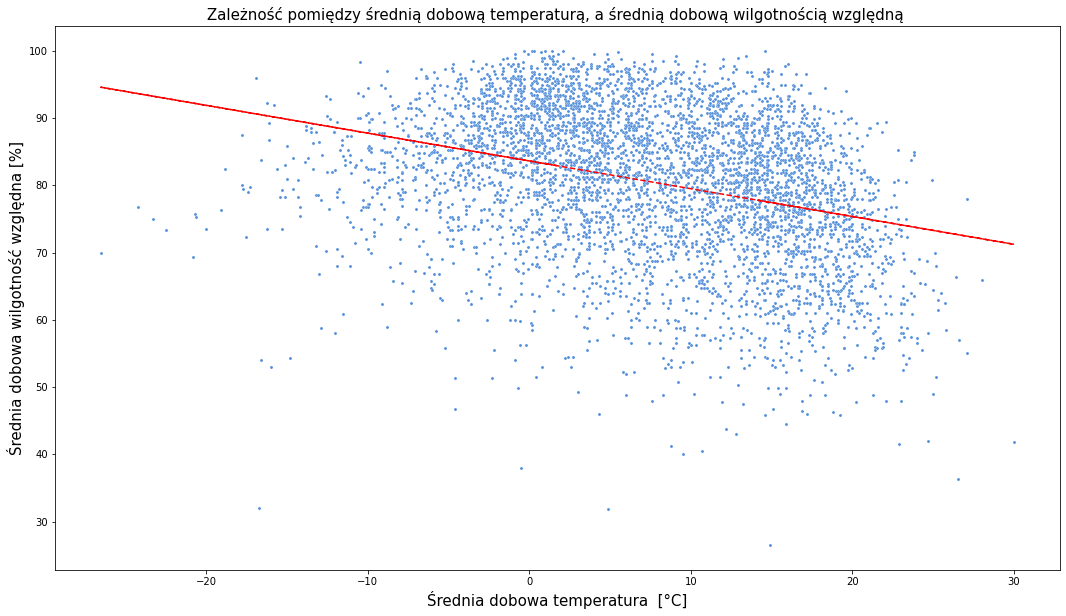

In [ ]:
plt.figure(figsize=(18,10))
df_overall = wykres1.sort_values(by=['Średnia dobowa temperatura  [°C]'])
sns.scatterplot(data=df_overall, x="Średnia dobowa temperatura  [°C]", y="Średnia dobowa wilgotność względna [%]", s = 10, color=mojapaleta[7])
plt.xlabel("Średnia dobowa temperatura  [°C]" ,fontsize=15)
plt.ylabel("Średnia dobowa wilgotność względna [%]",fontsize=15)
plt.title(f"Zależność pomiędzy średnią dobową temperaturą, a średnią dobową wilgotnością względną ",fontsize=15)
z = np.polyfit(wykres1['Średnia dobowa temperatura  [°C]'], wykres1['Średnia dobowa wilgotność względna [%]'], 1)
p = np.poly1d(z)
pl.plot(wykres1['Średnia dobowa temperatura  [°C]'],p(wykres1['Średnia dobowa temperatura  [°C]']),"r--")

Wykres 2 typu barplot przedstawia średnią temperaturą zależnie od średniego dobowego zachmurzenia. Widać, że wraz ze wzrostem zachmurzenia w niewielkim stopniu spada średnia temperatura powietrza, przy pełnym zachmurzeniu różnica ta jest znaczna.

In [ ]:
wykres2 = zbiory[(zbiory['Średnie dobowe zachmurzenie ogólne [oktanty]'] >= 0) &
                 (zbiory['Średnie dobowe zachmurzenie ogólne [oktanty]'] <= 9) &
                 (zbiory['Średnia dobowa temperatura  [°C]'] != 0)]

Text(0.5, 1.0, 'Zmiana średniej dobowej tempeartury wraz ze wzrostem średniego dobowego zachmurzenia ogólnego')

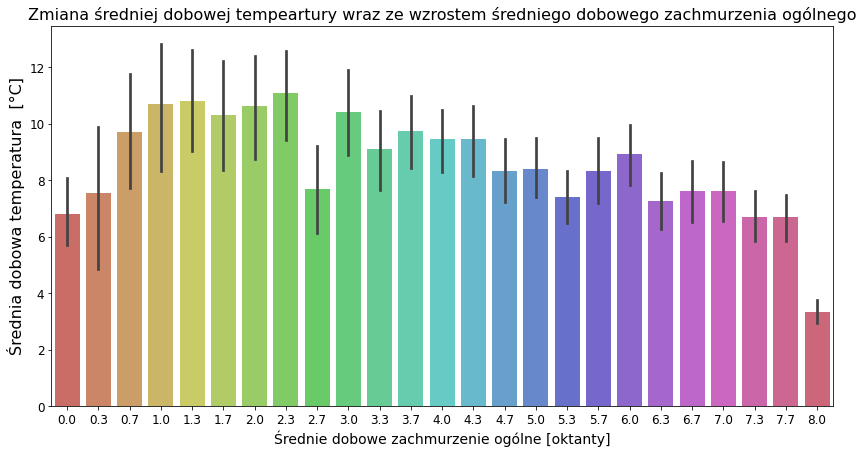

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.barplot(data=df_overall, x="Średnie dobowe zachmurzenie ogólne [oktanty]", y="Średnia dobowa temperatura  [°C]",
                palette=mojapaleta2)
plt.xlabel("Średnie dobowe zachmurzenie ogólne [oktanty]" ,fontsize=14)
plt.ylabel("Średnia dobowa temperatura  [°C]",fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Zmiana średniej dobowej tempeartury wraz ze wzrostem średniego dobowego zachmurzenia ogólnego",fontsize=16)


Do 3 typu wykresu pogrupowałem średnią dobową prędkość wiatru w 5 przedziałów. Wykorzystuje on typ violinplot i przedstawia rozkład średniej dobowej temperatury w nowo powstałych przedziałach prędkości wiatru. Jak widać skrajne wartosci w każdym przedziale są podobne, natomiast różni się ich natężenie w środkowej części. Czym silniejszy wiatr tym obszar z największą ilosci pomiarów przesuwa się niżej. Dla najsłabszych odczytów dominanta występuej w okolicach 15 [°C] z drugim mniejszym wzrostem w okoliach 0, natomiast dla najsilniejszego wiatru najczęściej obserwujemy temperaturę nie znacznie powyżej 0, następnie liczba pomiarów maleje w równym stopniu przy wzroście i spadku wartości. 

In [ ]:
wykres3 = zbiory[(zbiory['Średnia dobowa prędkość wiatru [m/s]'] > 0) &
                 (zbiory['Średnia dobowa temperatura  [°C]'] != 0)]

def zmiana_wieku(x):
    x = int(x)
    if x > 10:
        return ">10"
    elif x > 7.5:
        return "7.5-10"
    elif x > 5:
        return "5-7.5"
    elif x > 2.5:
        return "2.5-5"
    else:
        return "0-2.5"
wykres3['Średnia dobowa prędkość wiatru [m/s]'] = wykres3['Średnia dobowa prędkość wiatru [m/s]'].apply(lambda x:zmiana_wieku(x))

<ipython-input-13-d7cfe8b42c36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wykres3['Średnia dobowa prędkość wiatru [m/s]'] = wykres3['Średnia dobowa prędkość wiatru [m/s]'].apply(lambda x:zmiana_wieku(x))


Text(0.5, 1.0, 'Rozkład średniej dobowej temperatury zależnie od średniej dobowej prędkości wiatru')

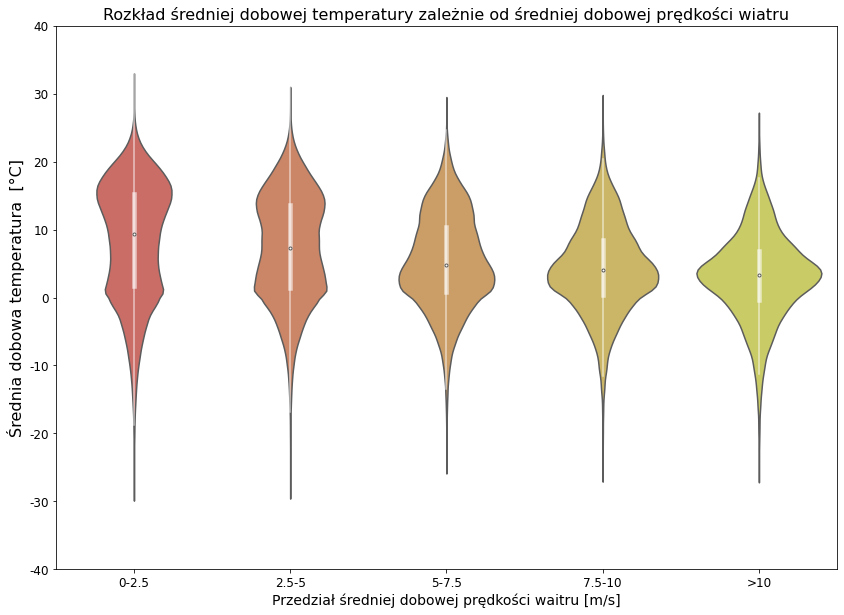

In [ ]:
plt.figure(figsize=(14,10))
ax = sns.violinplot(data=wykres3, x="Średnia dobowa prędkość wiatru [m/s]", y="Średnia dobowa temperatura  [°C]",
                    inner='box',cut=0, palette =mojapaleta2, order=[ "0-2.5", "2.5-5", "5-7.5", "7.5-10",">10"])
for l in ax.lines:
    l.set_linestyle('solid')
    l.set_color('white')
    l.set_alpha(0.6)
label_format = '{:,.0f}'
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
plt.xlabel("Przedział średniej dobowej prędkości waitru [m/s]" ,fontsize=14)
plt.ylabel("Średnia dobowa temperatura  [°C]",fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Rozkład średniej dobowej temperatury zależnie od średniej dobowej prędkości wiatru",fontsize=16)

# Interaktywny wykres obserwacji zjawiska w ujęciu czasowym 

Definiujemy funkcję która tworzy wykres zmienności w czasie, następnie definiujemy jeszcze widżet do zmiany zakresu dat. W kolejnym kroku zostaje utworzony interaktywny wykres który umożliwia wybór stacji badawczej, zmiennej którą chcemy obserwować, zakresu dat oraz koloru. 

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=250, barwa=(0.86, 0.33999999999999997, 0.8287999999999999)):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=barwa)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
import ipywidgets as widgets

dates = pd.date_range(zbiory["Data"].min(), zbiory["Data"].max(), freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Zakres dat',
    orientation='horizontal',
    layout={'width': '700px'}
)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.misc
from scipy import ndimage
@interact
def wykresinter(stacja=list(zbiory["Nazwa stacji"].unique()),
               zmienna = ["Średnia dobowa temperatura  [°C]",
                     "Średnia dobowa wilgotność względna [%]",
                     "Średnia dobowa prędkość wiatru [m/s]",
                     "Średnie dobowe zachmurzenie ogólne [oktanty]"],
               zakres = selection_range_slider,
               kolor = list(nazwykolorow)):
    numer = nazwykolorow.index(kolor)
    nrkolor = mojapaleta[numer]
    wykres2 = zbiory
    wykres2 = wykres2[(wykres2["Nazwa stacji"] == stacja) &
                     (wykres2["Data"] >= zakres[0]) &
                     (wykres2["Data"] <= zakres[1])]
    plot_df(wykres2, x=wykres2['Data'], y=wykres2[zmienna], title="test", xlabel="Data", ylabel=zmienna, barwa=nrkolor)

interactive(children=(Dropdown(description='stacja', options=('DYNÓW', 'SANOK-TREPCZA', 'KARPACZ', 'KRAKÓW-OBS…